**Kaggle API Client Installation**


In [ ]:
! pip install kaggle

In [ ]:
# configuring the path of Kaggle.joon film
! takdir -p/.kaggle
!cp kaggle.json/.kaggle/
! Ichmod 600-/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d kazanova/sentiment140

### **Loading the dataset**

In [ ]:
#Extract the compressed dataset from
from zipfile import ZipFile
df = "/content/sentiment140.zip"

with ZipFile(df , "r") as zip:
  zip.extractall()
  print("The dataset is extracted")

**Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk


**Load NLTK Stopwords**


In [ ]:
from nltk.corpus import stopwords


In [ ]:
nltk.download("stopwords")


In [ ]:
print(stopwords.words("english"))

 **Reading the CSV file**

In [ ]:
Twitter_df = pd.read_csv("/content/training.1600000.processed.noemoticon.csv",encoding="ISO-8859-1")

**DataFrame Dimensions Check**



In [ ]:
Twitter_df.shape

**View First Few Rows of DataFrame**


In [ ]:
Twitter_df.head()

**Naming the columns**

In [ ]:
column_names=["Target","Id","Date","Flag","User","Text"]
Twitter_df = pd.read_csv("/content/training.1600000.processed.noemoticon.csv",names=column_names,encoding="ISO-8859-1")


**Display DataFrame Columns**


In [ ]:
Twitter_df.columns

**Getting information about our dataset**

In [ ]:
Twitter_df.info()

**DataFrame Shape After Listing Columns**


In [ ]:
Twitter_df.shape

In [ ]:
Twitter_df.head()

**Missing Values Check**


In [ ]:
Twitter_df.isnull().sum()

**Distribution of Target Column**


In [ ]:
Twitter_df["Target"].value_counts()

**Replacing Target Column Values**


In [ ]:
# Converting target "4" to "1"
Twitter_df.replace({"Target":{4:1}},inplace = True)

In [ ]:
Twitter_df["Target"].value_counts()

0 represnts Negative tweet

1 represents Positive tweet

**Unique and Duplicated Text Values Analysis**


In [ ]:
print("The number of unique values of the text feature is {}".format(Twitter_df["Text"].nunique()))
print("The total number of rows in our dataframe is : {}".format(len(Twitter_df)))
print("The number of duplicated rows in our dataframe is : {}".format(len(Twitter_df)-Twitter_df["Text"].nunique()))

In [ ]:
# Removing duplicate row records but keeping original text : ( we only keep the first duplicate )
Twitter_df= Twitter_df.drop_duplicates(subset='Text', keep='first')

In [ ]:
# And now, let's see our tweet content feature:
print("The number of unique values of the text feature is {}".format(Twitter_df["Text"].nunique()))
print("The total number of rows in our dataframe is : {}".format(len(Twitter_df)))
print("The number of duplicated rows in our dataframe is : {}".format(len(Twitter_df)-Twitter_df["Text"].nunique()))

##**Exploratory Data Analysis**

**Grouping and Counting Rows by Target**


In [ ]:
Twitter_df.groupby('Target').count()

**Visualizing the Distribution of Target Variable**


In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of the target variable
ax = Twitter_df.groupby('Target').count().plot(kind='bar', title='Distribution of data',legend=False)

# Naming 0 -> Negative and 1 -> Positive
ax.set_xticklabels(['Negative', 'Positive'], rotation=0)

text, sentiment = list(Twitter_df['Text']), list(Twitter_df['Target'])



**Count Plot of Target Variable**


In [ ]:
import seaborn as sns
sns.countplot(x='Target', data=Twitter_df)

# **Data Preprocessing**

**Converting Text to Lowercase**


In [ ]:
# Making statement text in lower case :
Twitter_df['Text'] = Twitter_df['Text'].str.lower()
Twitter_df['Text'].head()

**Function to Replace Informal Words with Formal Equivalents**


In [ ]:
informal_to_formal = {
    "wanna": "want to",
    "gonna": "going to",
    "gotta": "got to",
    "lemme": "let me",
    "gimme": "give me",
    "kinda": "kind of",
    "sorta": "sort of",
    "ain't": "is not",
    "coulda": "could have",
    "shoulda": "should have",
    "woulda": "would have",
    "can't": "cannot",
    "cant": "cannot",
    "won't": "will not",
    "wont": "will not",
    "don't": "do not",
    "y'all": "you all",
    "i'm": "I am",
    "we're": "we are",
    "you're": "you are",
    "they're": "they are",
    "he's": "he is",
    "she's": "she is",
    "it's": "it is",
    "there's": "there is",
    "isn't": "is not",
    "aren't": "are not",
    "wasn't": "was not",
    "weren't": "were not",
    "hasn't": "has not",
    "haven't": "have not",
    "hadn't": "had not",
    "wouldn't": "would not",
    "shouldn't": "should not",
    "couldn't": "could not",
    "doesn't": "does not",
    "dunno": "do not know",
    "whatcha": "what are you",
    "outta": "out of",
    "lotta": "lot of",
    "hafta": "have to",
    "oughta": "ought to",
    "tryna": "trying to",
    "needta": "need to",
    "gotcha": "got you",
    "d'you": "do you",
    "what're": "what are",
    "y'know": "you know",
    "c'mon": "come on",
    "let's": "let us",
    "ma'am": "madam",
    "couldn't've": "could not have",
    "wouldn't've": "would not have",
    "shouldn't've": "should not have",
    "yep": "yes",
    "nope": "no",
    "lotsa": "lots of",
    "d'ya": "do you",
    "gimme": "give me",
    "kinda": "kind of",
    "watcha": "what are you",
    "whatcha": "what are you",
    "whatcha doing": "what are you doing",
    "whatcha up to": "what are you up to",
    "ain't no": "is not any",
    "ain't got": "have not got",
    "betcha": "bet you",
    "d'you": "do you",
    "how're": "how are",
    "here's": "here is",
    "goin'": "going",
    "gotta": "have got to",
    "wanna": "want to",
    "cuz": "because",
    "coz": "because",
    "plz": "please",
    "thx": "thanks",
    "gr8": "great",
    "u": "you",
    "ur": "your",
    "l8r": "later",
    "b4": "before",
    "msg": "message",
    "txt": "text",
    "pic": "picture",
    "tmrw": "tomorrow",
    "brb": "be right back",
    "idk": "I do not know",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "btw": "by the way",
    "fyi": "for your information",
    "lol": "laugh out loud",
    "rofl": "rolling on the floor laughing",
    "omg": "oh my god",
    "omw": "on my way",
    "thru": "through",
    "tho": "though",
    "ya": "you",
    "cya": "see you",
    "u're": "you are",
    "urself": "yourself",
    "thru": "through",
    "luv": "love",
    "bc": "because",
    "xoxo": "hugs and kisses",
    "w/e": "whatever",
    "b/c": "because",
    "ne1": "anyone",
    "nvm": "never mind",
    "ty": "thank you",
    "ttyl": "talk to you later",
    "b4n": "bye for now",
    "cul8r": "see you later",
    "gr8t": "great",
    "n8": "night",
    "nite": "night",
    "cu": "see you",
    "lmk": "let me know",
    "np": "no problem",
    "rly": "really",
    "sry": "sorry",
    "thx": "thanks",
    "u2": "you too",
    "you've": "you have",
    "you'll": "you will",
    "I've": "I have",
    "I'll": "I will",
    "we'll": "we will",
    "they'll": "they will",
    "he'll": "he will",
    "she'll": "she will",
    "it'll": "it will",
    "that'll": "that will",
    "who's": "who is",
    "what's": "what is",
    "where's": "where is",
    "when's": "when is",
    "why's": "why is",
    "how's": "how is",
    "here's": "here is",
    "there'll": "there will",
    "they've": "they have",
    "we've": "we have",
    "should've": "should have",
    "would've": "would have",
    "could've": "could have",
    "must've": "must have",
    "might've": "might have",
    "we'd": "we would",
    "you'd": "you would",
    "he'd": "he would",
    "she'd": "she would",
    "I'd": "I would",
    "I'd've": "I would have",
    "you'd've": "you would have",
    "he'd've": "he would have",
    "she'd've": "she would have",
    "we'd've": "we would have",
    "they'd've": "they would have",
    "couldn't've": "could not have",
    "wouldn't've": "would not have",
    "shouldn't've": "should not have"
}






In [ ]:
def replace_informal_words(text):
    # Iterate through the dictionary and replace informal words
    for informal, formal in informal_to_formal.items():
        text = re.sub(r'\b{}\b'.format(re.escape(informal)), formal, text, flags=re.IGNORECASE)
    return text

In [30]:
Twitter_df['Text']= Twitter_df['Text'].apply(lambda text: replace_informal_words(text))
Twitter_df['Text'].head()

,Text
0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,is upset that he cannot update his facebook by...
2,@kenichan i dived many times for the ball. man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it is not behaving at all..."


**Removing Stop Words from Tweet Text**


In [31]:
stopwordlist = stopwords.words('english')

In [32]:
# Cleaning and removing the above stop words list from the tweet text :
STOPWORDS = set(stopwordlist)


def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


Twitter_df['Text'] = Twitter_df['Text'].apply(lambda text: cleaning_stopwords(text))
Twitter_df['Text'].head()

,Text
0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,upset cannot update facebook texting it... mig...
2,@kenichan dived many times ball. managed save ...
3,whole body feels itchy like fire
4,"@nationwideclass no, behaving all. I mad. here..."


**Removing Punctuations from Tweet Text**


In [33]:
#  Cleaning and removing punctuations :
import string

english_punctuations = string.punctuation
punctuations_list = english_punctuations


def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


Twitter_df['Text'] = Twitter_df['Text'].apply(lambda x: cleaning_punctuations(x))
Twitter_df['Text'].head()

,Text
0,switchfoot httptwitpiccom2y1zl awww thats bum...
1,upset cannot update facebook texting it might ...
2,kenichan dived many times ball managed save 50...
3,whole body feels itchy like fire
4,nationwideclass no behaving all I mad here can...


**Removing Extra Whitespaces from Tweet Text**


In [34]:

def RemoveWhitespaces(text):
    text=text.strip()  # Leading and trailing whitespaces are removed
    return re.sub(r" +"," ",text)


Twitter_df['Text']=Twitter_df['Text'].apply(lambda x: RemoveWhitespaces(x))
Twitter_df['Text'].head()

,Text
0,switchfoot httptwitpiccom2y1zl awww thats bumm...
1,upset cannot update facebook texting it might ...
2,kenichan dived many times ball managed save 50...
3,whole body feels itchy like fire
4,nationwideclass no behaving all I mad here can...


**Removing URLs from Tweet Text**


In [35]:
# Cleaning and removing URL’s :
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', data)


Twitter_df['Text'] = Twitter_df['Text'].apply(lambda x: cleaning_URLs(x))
Twitter_df['Text'].head()

,Text
0,switchfoot httptwitpiccom2y1zl a s bummer got ...
1,upset cannot update facebook texting it might ...
2,kenichan dived many times ball managed save 50...
3,whole body feels itchy like fire
4,nationwideclass no behaving all I mad here can...


**Removing Numeric Characters from Tweet Text**


In [36]:
# Cleaning and removing Numeric numbers :
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
Twitter_df['Text'] = Twitter_df['Text'].apply(lambda x: cleaning_numbers(x))
Twitter_df['Text'].head()

,Text
0,switchfoot httptwitpiccomyzl a s bummer got da...
1,upset cannot update facebook texting it might ...
2,kenichan dived many times ball managed save r...
3,whole body feels itchy like fire
4,nationwideclass no behaving all I mad here can...


**Cleaning and Removing Links from Tweet Text**


In [37]:
# Cleaning and removing links :
def cleaning_links(data):
    return re.sub(r'http\S+|www\S+|https\S+', '', data, flags=re.MULTILINE)
Twitter_df['Text'] = Twitter_df['Text'] .apply(lambda x: cleaning_links(x))
Twitter_df['Text'] .head()


,Text
0,switchfoot a s bummer got david carr third da...
1,upset cannot update facebook texting it might ...
2,kenichan dived many times ball managed save r...
3,whole body feels itchy like fire
4,nationwideclass no behaving all I mad here can...


### **Word Tokenization**

**Tokenizing Tweet Text**


In [38]:
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [39]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
Twitter_df['tokenized_tweets'] = Twitter_df['Text'].apply(word_tokenize)
Twitter_df.head()

,Target,Id,Date,Flag,User,Text,tokenized_tweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot a s bummer got david carr third da...,"[switchfoot, a, s, bummer, got, david, carr, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cannot update facebook texting it might ...,"[upset, can, not, update, facebook, texting, i..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dived many times ball managed save r...,"[kenichan, dived, many, times, ball, managed, ..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire,"[whole, body, feels, itchy, like, fire]"
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no behaving all I mad here can...,"[nationwideclass, no, behaving, all, I, mad, h..."


In [42]:
Twitter_df = Twitter_df.drop(columns=["Date", "Flag", "User"])


In [43]:
Twitter_df.head()

,Target,Id,Text,tokenized_tweets
0,0,1467810369,switchfoot a s bummer got david carr third da...,"[switchfoot, a, s, bummer, got, david, carr, t..."
1,0,1467810672,upset cannot update facebook texting it might ...,"[upset, can, not, update, facebook, texting, i..."
2,0,1467810917,kenichan dived many times ball managed save r...,"[kenichan, dived, many, times, ball, managed, ..."
3,0,1467811184,whole body feels itchy like fire,"[whole, body, feels, itchy, like, fire]"
4,0,1467811193,nationwideclass no behaving all I mad here can...,"[nationwideclass, no, behaving, all, I, mad, h..."


**Lemmatizing Text with POS Tagging**


In [44]:
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [45]:
lm = nltk.WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun
def lemmatizer_on_text(text):
    # Ensure the text is tokenized (split into a list of words)
    if isinstance(text, str):
        tokens = text.split()
    else:
        tokens = text  # Assuming it's already a list of words
    # Perform POS tagging
    pos_tags = nltk.pos_tag(tokens)
    # Lemmatize each word with the correct POS tag
    lemmatized_text = [lm.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    # Convert the list of lemmatized words back into a single string
    return " ".join(lemmatized_text)



In [46]:
## Applying the fucntion to all rows :
Twitter_df['tokenized_tweets_lemmatized'] =Twitter_df['tokenized_tweets'].apply(lambda text: lemmatizer_on_text(text))

In [47]:
Twitter_df.head()

,Target,Id,Text,tokenized_tweets,tokenized_tweets_lemmatized
0,0,1467810369,switchfoot a s bummer got david carr third da...,"[switchfoot, a, s, bummer, got, david, carr, t...",switchfoot a s bummer get david carr third day...
1,0,1467810672,upset cannot update facebook texting it might ...,"[upset, can, not, update, facebook, texting, i...",upset can not update facebook texting it might...
2,0,1467810917,kenichan dived many times ball managed save r...,"[kenichan, dived, many, times, ball, managed, ...",kenichan dive many time ball manage save rest ...
3,0,1467811184,whole body feels itchy like fire,"[whole, body, feels, itchy, like, fire]",whole body feel itchy like fire
4,0,1467811193,nationwideclass no behaving all I mad here can...,"[nationwideclass, no, behaving, all, I, mad, h...",nationwideclass no behave all I mad here can n...


In [48]:
Twitter_df.tail()

,Target,Id,Text,tokenized_tweets,tokenized_tweets_lemmatized
1599995,1,2193601966,woke up school best feeling ever,"[woke, up, school, best, feeling, ever]",wake up school best feeling ever
1599996,1,2193601969,thewdbcom cool hear old walt interviews â«,"[thewdbcom, cool, hear, old, walt, interviews,...",thewdbcom cool hear old walt interview â «
1599997,1,2193601991,ready mojo makeover ask details,"[ready, mojo, makeover, ask, details]",ready mojo makeover ask detail
1599998,1,2193602064,happy th birthday boo alll time tupac amaru sh...,"[happy, th, birthday, boo, alll, time, tupac, ...",happy th birthday boo alll time tupac amaru sh...
1599999,1,2193602129,happy charitytuesday thenspcc sparkscharity sp...,"[happy, charitytuesday, thenspcc, sparkscharit...",happy charitytuesday thenspcc sparkscharity sp...


In [49]:
Twitter_df.shape

(1581466, 5)

In [50]:
Twitter_df.to_csv("cleaned.csv")

**Display a Word Cloud from Text Data**

In [51]:
from wordcloud import WordCloud

In [52]:
# Let's create a function which creates a wordcloud of a given pandas Series object :
def wordCloud(data_pos, max_words):
    # call the wordcloud function to show the most top 1000 used words:
    cloud = WordCloud(max_words=max_words, background_color="white", width=1600, height=800,
                      collocations=False).generate(" ".join(data_pos))
    plt.figure(figsize=(20, 20))
    plt.imshow(cloud)

**Generating Word Cloud for Positive Tweets**

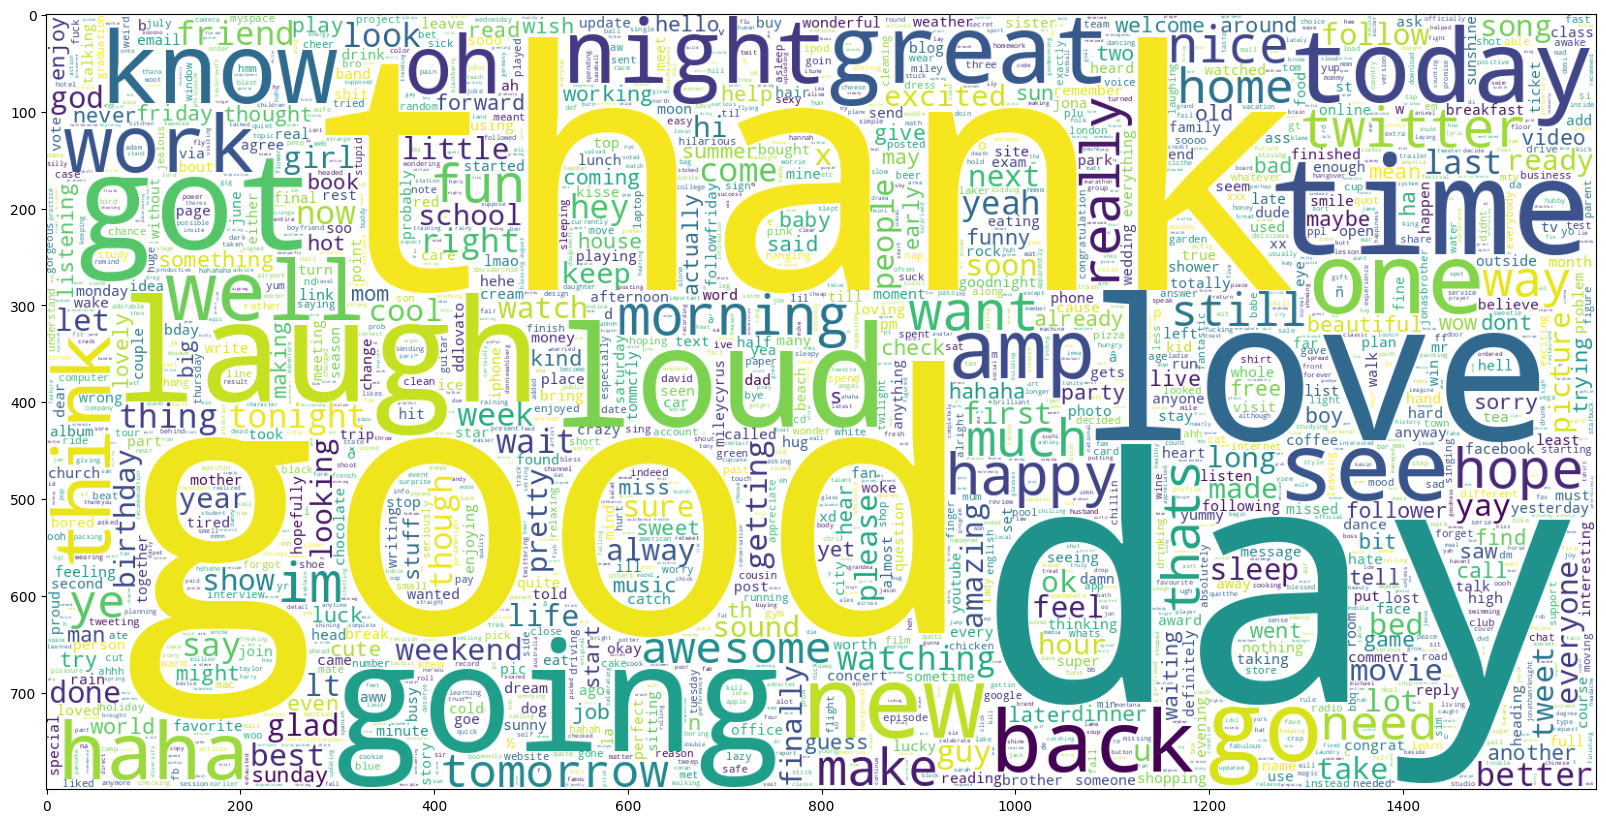

In [53]:
wordCloud(Twitter_df.loc[Twitter_df["Target"] == 1, "Text"],2000)

**Generating Word Cloud for Negative Tweets**

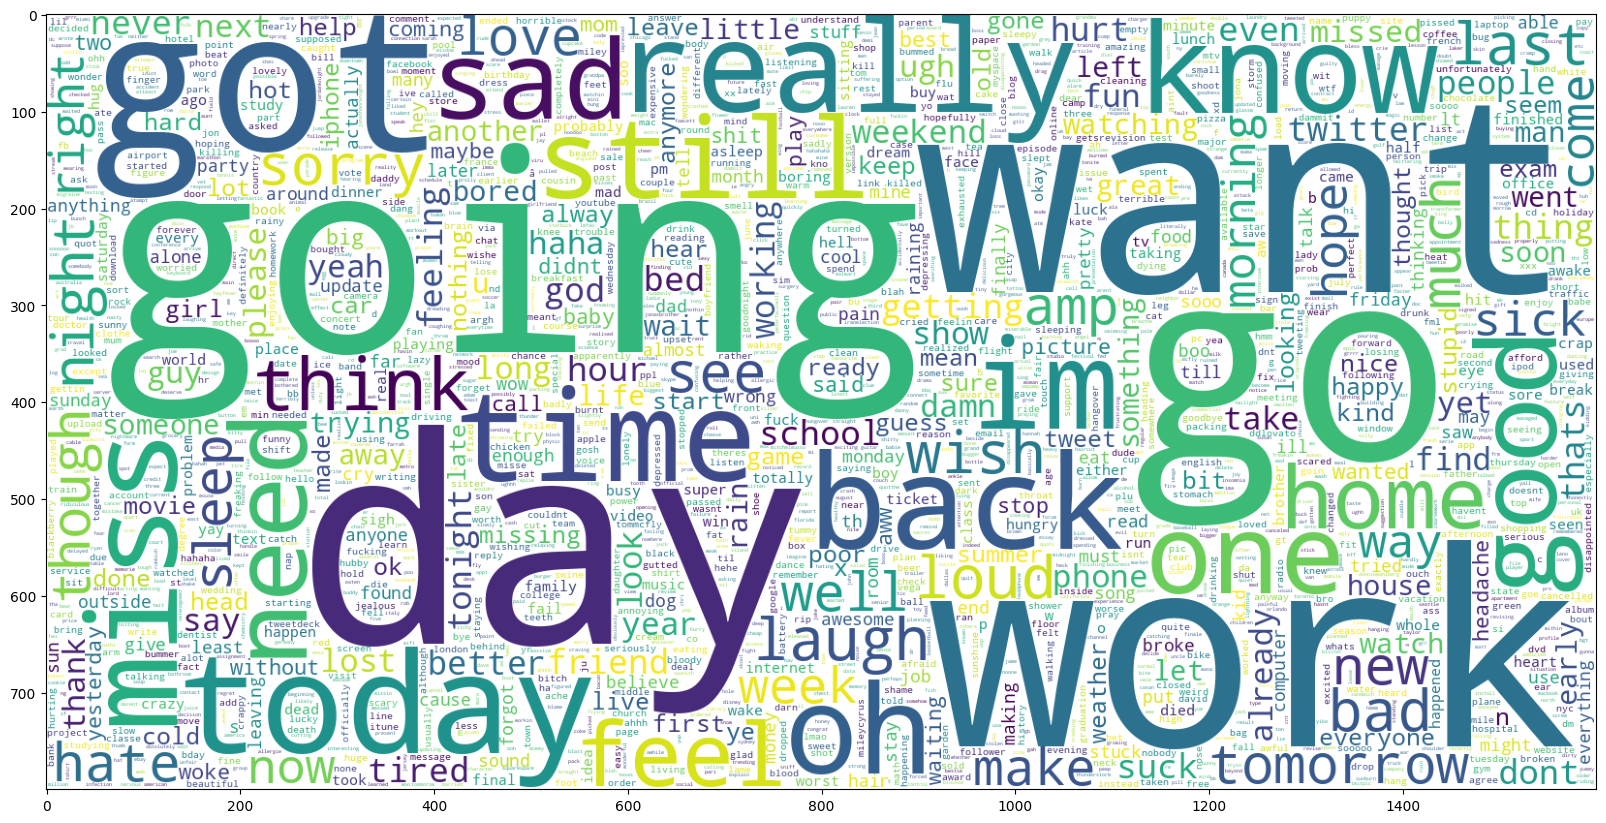

In [54]:

wordCloud(Twitter_df.loc[Twitter_df["Target"] == 0, "Text"], 2000)

**Separating Features and Labels**

In [55]:
# Separating input feature and label :
X = Twitter_df["tokenized_tweets_lemmatized"]
y = Twitter_df["Target"]

**Splitting Data into Training and Testing Sets**

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# Separating the 85% data for training data and 15% for testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)


**Fitting TF-IDF Vectorizer and Displaying Feature Count**

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [59]:
# Fit the TF-IDF Vectorizer :
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  10000


In [60]:
# Transform the data using TF-IDF Vectorizer :
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

## **Model Evaluation**

In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB


In [62]:
def model_Evaluate(model):
    # Predict values for Training dataset
    y_train_pred = model.predict(X_train)
    training_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy: {training_accuracy:.4f}")

    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    testing_accuracy = accuracy_score(y_test, y_pred)
    print(f"Testing Accuracy: {testing_accuracy:.4f}")

    # Print the evaluation metrics for the Test dataset
    print("\nClassification Report on Test Data:")
    print(classification_report(y_test, y_pred))


In [63]:

def plot_confusion_matrix(y_true, y_pred):
    # Compute the confusion matrix
    cf_matrix = confusion_matrix(y_true, y_pred)

    # Create a heatmap with normalized values
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])

    plt.xlabel('Predicted values', fontsize=14)
    plt.ylabel('Actual values', fontsize=14)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()


### **Model-1 : Logistic Regression**

In [64]:
# Model-1 : LogisticRegression.
LR = LogisticRegression(C=1.0,max_iter=1000)
LR.fit(X_train, y_train)
model_Evaluate(LR)



Training Accuracy: 0.7797
Testing Accuracy: 0.7751

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    118830
           1       0.76      0.80      0.78    118390

    accuracy                           0.78    237220
   macro avg       0.78      0.78      0.78    237220
weighted avg       0.78      0.78      0.78    237220



In [65]:
y_pred = LR.predict(X_test)

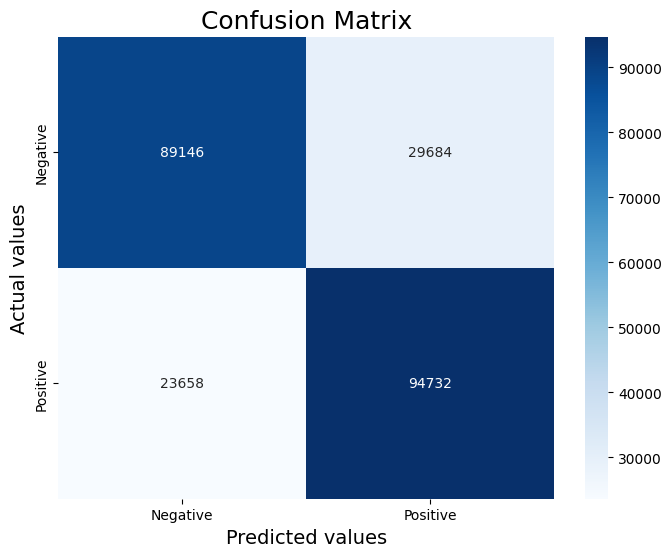

In [66]:
plot_confusion_matrix(y_test, y_pred)

In [79]:
# Perform cross-validation
cv_scores = cross_val_score(LR, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.77351683 0.77521955 0.77622011 0.77562498 0.77373172]
Average Cross-Validation Score: 0.7749
Cross-Validation Scores: [0.77351683 0.77521955 0.77622011 0.77562498 0.77373172]
Average Cross-Validation Score: 0.7749


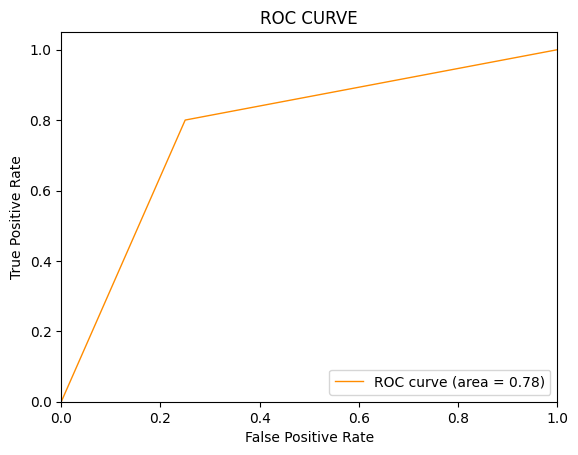

In [68]:
# Plot the ROC-AUC Curve for model-1 :
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**Model-2 : Support vector classifier**

In [69]:
# Model-1 : LogisticRegression.
SVCmodel = LinearSVC(C=0.1)
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training Accuracy: 0.7790
Testing Accuracy: 0.7746

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    118830
           1       0.76      0.80      0.78    118390

    accuracy                           0.77    237220
   macro avg       0.78      0.77      0.77    237220
weighted avg       0.78      0.77      0.77    237220



In [70]:
y_pred = SVCmodel.predict(X_test)

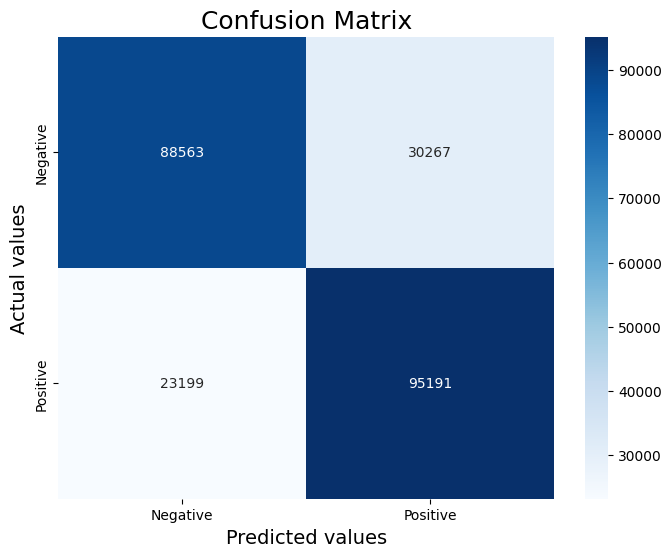

In [71]:
plot_confusion_matrix(y_test, y_pred)

In [72]:
# Perform cross-validation
cv_scores = cross_val_score(SVCmodel , X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {cv_scores.mean():.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: Futu

Cross-Validation Scores: [0.77285847 0.77452771 0.7755915  0.7749815  0.77293574]
Average Cross-Validation Score: 0.7742


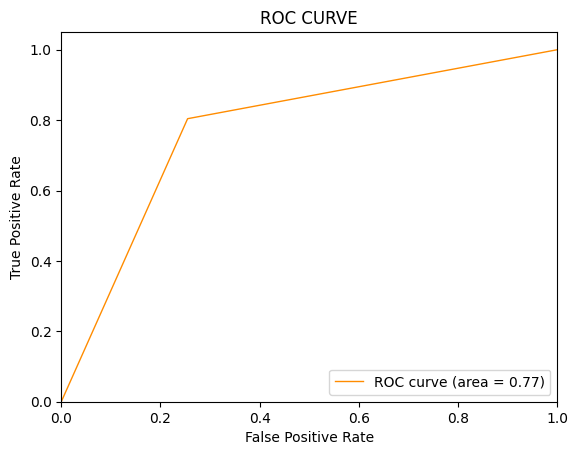

In [73]:
# Plot the ROC-AUC Curve for model-2 :
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**Model-3 : Bernoulli Naive Bayes**

In [74]:
# Model-3 :
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

Training Accuracy: 0.7606
Testing Accuracy: 0.7588

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75    118830
           1       0.74      0.79      0.77    118390

    accuracy                           0.76    237220
   macro avg       0.76      0.76      0.76    237220
weighted avg       0.76      0.76      0.76    237220



In [75]:
y_pred = BNBmodel.predict(X_test)

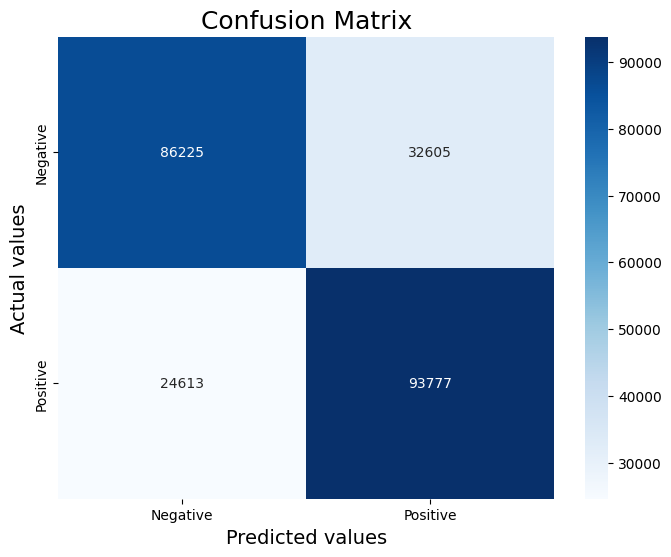

In [76]:
plot_confusion_matrix(y_test, y_pred)

In [77]:
# Perform cross-validation
cv_scores = cross_val_score(BNBmodel , X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.75723266 0.75876049 0.75984661 0.75794963 0.75823976]
Average Cross-Validation Score: 0.7584


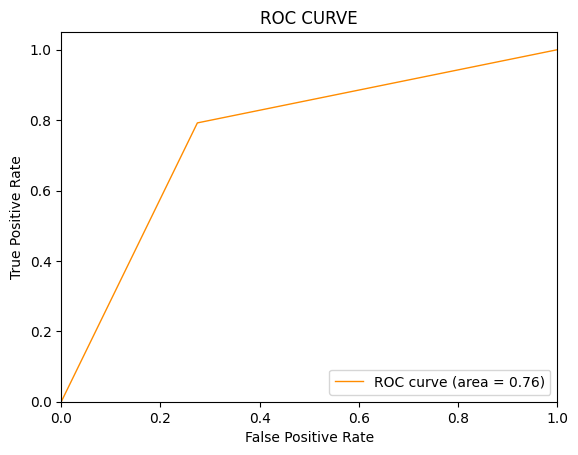

In [78]:
# Plot the ROC-AUC Curve for model-3 :
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()